<a href="https://colab.research.google.com/github/ddenebb/hipotesis_testing/blob/main/Tasca_M5_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description
Train-Test exercises with ScikitLearn from a dataset with information about housing in Houston.

#- Exercise 1

Split the attached data set in train and test. Study the two sets separately, on a descriptive level.

Also attached you will find a description of the different variables of the dataset.

In [54]:
from google.colab import drive
drive.mount('/content/drive')
images_dir = '/content/gdrive/My Drive/Images'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
import warnings

warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 5/Data/housing data.csv"
col_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv(path, names=col_names)
print(df.info(memory_usage='deep'))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.


# Observations:
The database has 506 records. There are no null fields. They are all numeric fields. CHAS is a dummy variable referring to Charles River (= 1 if tract bounds river; 0 otherwise)

A boxplot is created to show distribution of the raw data:

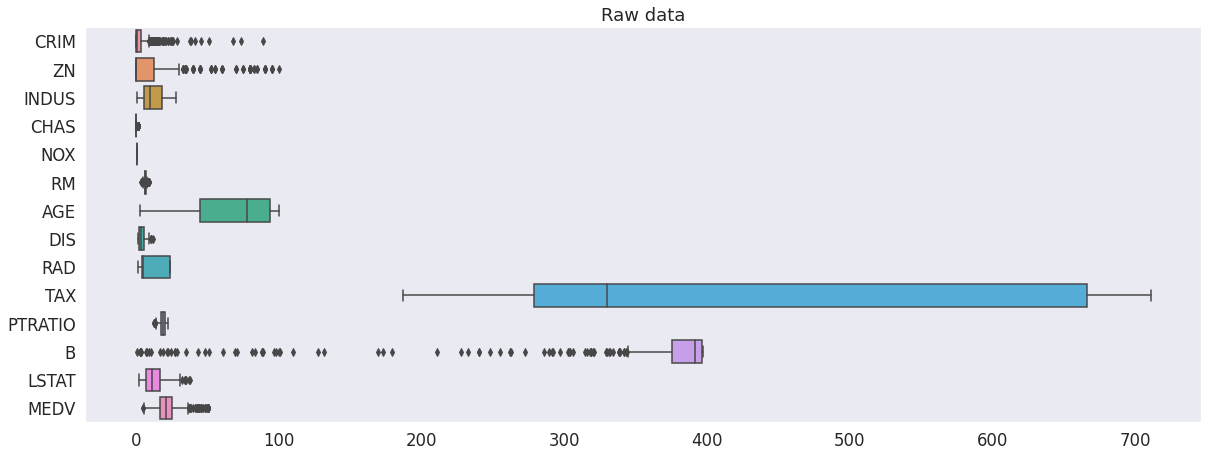

In [56]:
plt.figure(figsize=(20,16))

plt.subplot(2,1,1)
sns.boxplot(data=df, orient='h');
plt.title('Raw data')
plt.grid(axis='x')

It can be seen that columns  'CRIM', 'ZM', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT' AND 'MEDV' have outliers (some of them quite a lot!) and 'INDUS', 'NOX', 'AGE', 'RAD' and 'TAX' don´t have outliers. The 'CHAS' column only has 0 or 1 values as it is a dummy.

A shapiro test will be performed to find out whether the data is normal

In [57]:
import scipy.stats as stats
alpha = 0.05
for column in df.columns:
    stat, p = stats.shapiro(df[column])
    print(f"Column: {column} - Statistic: {stat}, p-value: {p}")
    if p > alpha:
        print(f"The data in column {column} is normally distributed (fail to reject H0)")
    else:
        print(f"The data in column {column} is not normally distributed (reject H0)")


Column: CRIM - Statistic: 0.44996464252471924, p-value: 1.3285517473179391e-36
The data in column CRIM is not normally distributed (reject H0)
Column: ZN - Statistic: 0.5559463500976562, p-value: 7.882576753156324e-34
The data in column ZN is not normally distributed (reject H0)
Column: INDUS - Statistic: 0.8997913002967834, p-value: 1.0641241829131273e-17
The data in column INDUS is not normally distributed (reject H0)
Column: CHAS - Statistic: 0.27476072311401367, p-value: 2.350467979135232e-40
The data in column CHAS is not normally distributed (reject H0)
Column: NOX - Statistic: 0.9356356263160706, p-value: 5.775580887027246e-14
The data in column NOX is not normally distributed (reject H0)
Column: RM - Statistic: 0.9608717560768127, p-value: 2.4114604757485836e-10
The data in column RM is not normally distributed (reject H0)
Column: AGE - Statistic: 0.8920129537582397, p-value: 2.2305888882906016e-18
The data in column AGE is not normally distributed (reject H0)
Column: DIS - Sta

A new variable called "X" will be created that contains all the columns of the original dataframe "df", except for the column "MEDV".
Another new variable called "y" will be created that contains only the values of the column "MEDV" from the original dataframe "df". This column represents the target variable of the dataset, which is the variable we want to predict.
Split he dataset in 80% train and 20% test.


In [58]:
from sklearn.model_selection import train_test_split

X = df.drop("MEDV", axis=1) # attributes
y = df["MEDV"] # target variable 

X_list = list(X.columns)
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train and test batches are converted to dataframes in order to compare them statistically and visually.

In [59]:
X_train_df = pd.DataFrame(X_train, columns=X_list)
X_test_df = pd.DataFrame(X_test, columns=X_list)
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])

How many outliers does the dataset have in the numerical attributes? What percentage do they represent of the total?

The definition of an outlier is all that value that is above Q3 or below Q1 more than 1.5 times the interquartile range.

In [60]:
     #attributes
Q1 = X_train_df.quantile(0.25)
Q3 = X_train_df.quantile(0.75)
IQR = Q3 - Q1   #interquartilic range

outliers_bool = (X_train_df < (Q1 - 1.5 * IQR)) |(X_train_df > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)
outliers_perc = outliers_abs * 100 / X_train_df.count(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')
print(f'% of outliers vs total:\n{outliers_perc}')

Total number of outliers:
CRIM       61
ZN         36
INDUS       0
CHAS       29
NOX         0
RM         24
AGE         0
DIS         3
RAD         0
TAX         0
PTRATIO     0
B          63
LSTAT       7
dtype: int64

% of outliers vs total:
CRIM       15.099010
ZN          8.910891
INDUS       0.000000
CHAS        7.178218
NOX         0.000000
RM          5.940594
AGE         0.000000
DIS         0.742574
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B          15.594059
LSTAT       1.732673
dtype: float64


In [61]:
Q1 = X_test_df.quantile(0.25)
Q3 = X_test_df.quantile(0.75)
IQR = Q3 - Q1   #interquartilic range

outliers_bool = (X_test_df < (Q1 - 1.5 * IQR)) |(X_test_df > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)
outliers_perc = outliers_abs * 100 / X_test_df.count(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')
print(f'% of outliers vs total:\n{outliers_perc}')

Total number of outliers:
CRIM       11
ZN         24
INDUS       0
CHAS        6
NOX         0
RM          8
AGE         0
DIS         4
RAD         0
TAX         0
PTRATIO     9
B          14
LSTAT       2
dtype: int64

% of outliers vs total:
CRIM       10.784314
ZN         23.529412
INDUS       0.000000
CHAS        5.882353
NOX         0.000000
RM          7.843137
AGE         0.000000
DIS         3.921569
RAD         0.000000
TAX         0.000000
PTRATIO     8.823529
B          13.725490
LSTAT       1.960784
dtype: float64


As pre-processing both normalization and robust scaling can be combined. Normalizing will help bring all the features to the same scale, which can improve the performance of the model.Normalization will be applied for columns 'INDUS', 'NOX', 'AGE', 'RAD' and 'TAX' as they do not have outliers and robust scaling will be applied for columns 'CRIM', 'ZM', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT' AND 'MEDV' as they have outliers. 'CHAS' column won´t be processed as its values are binary.

In [62]:
X_test_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.630947,10.549020,11.737745,0.058824,0.547609,6.160833,68.648039,3.742949,10.313725,424.892157,18.999020,358.241275,13.428235
std,7.459607,24.083242,6.722576,0.236456,0.108602,0.663825,28.890866,2.010749,9.161889,177.462472,1.800577,90.641872,7.244601
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.561000,6.200000,1.169100,1.000000,188.000000,13.000000,6.680000,2.880000
25%,0.087368,0.000000,6.102500,0.000000,0.448250,5.870250,43.800000,2.263950,4.000000,281.750000,18.400000,375.020000,7.687500
50%,0.209885,0.000000,10.590000,0.000000,0.532000,6.170500,74.700000,3.353400,5.000000,345.000000,19.200000,392.205000,12.335000
75%,4.522472,0.000000,18.100000,0.000000,0.621500,6.479250,95.225000,4.764825,24.000000,666.000000,20.200000,396.900000,18.017500
max,45.746100,95.000000,27.740000,1.000000,0.871000,8.034000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,36.980000


In [63]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [64]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    float64
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    float64
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
dtypes: float64(13)
memory usage: 10.5 KB


In [65]:
X_train_df[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']]

,INDUS,NOX,AGE,RAD,TAX
0,18.10,0.6140,97.3,24.0,666.0
1,8.14,0.5380,56.5,4.0,307.0
2,6.06,0.4379,23.3,1.0,304.0
3,18.10,0.6140,85.1,24.0,666.0
4,8.14,0.5380,69.5,4.0,307.0
...,...,...,...,...,...
399,8.56,0.5200,91.9,5.0,384.0
400,6.96,0.4640,42.1,3.0,223.0
401,2.01,0.4350,29.7,4.0,280.0
402,18.10,0.7400,94.6,24.0,666.0


#- Exercise 2
Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).

Standardizing numerical data: This technique is used to normalize the numerical data by subtracting the mean and dividing by the standard deviation. This is often done to ensure that the numerical data has a mean of 0 and a standard deviation of 1, which can help the model converge faster and improve its performance.
The RobustScaler is used when the data has outliers and it is desired to remove the effect of outliers from the features. Unlike the StandardScaler, which scales the features using the mean and standard deviation of the data, the RobustScaler uses the median and interquartile range (IQR) to scale the features. This makes it more robust to outliers because it does not use the mean, which is sensitive to outliers. The result of using the RobustScaler is that the features are scaled to have a median of zero and IQR of 1, which helps to remove the effect of outliers from the features and to make the data easier to analyze and model.

Process X-train dataset: The following cell normalizes some columns with a standard scaler, and then robustly scales other columns with a robust scaler. This allows to handling features that have outliers differently, and can help prevent the scaling of certain features from affecting the overall scaling of the data.The resultant dataframe (X_train_robust) includes the 'CHAS' column that wasn't processed. The 'CHAS' column is not included in any of the lists 'cols_to_norm' or 'cols_to_robust' so it is not being transformed or scaled in any way.

In [66]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np

# normalize columns 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX'
X_train_norm = X_train.copy()
cols_to_norm = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']
index_cols_to_norm = [X_list.index(col) for col in cols_to_norm]

scaler = StandardScaler()
X_train_norm[:, index_cols_to_norm] = scaler.fit_transform(X_train_norm[:, index_cols_to_norm])

# robust scale columns 'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'
X_train_robust = X_train_norm.copy()
cols_to_robust = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
index_cols_to_robust = [X_list.index(col) for col in cols_to_robust]

scaler = RobustScaler()
X_train_robust[:, index_cols_to_robust] = scaler.fit_transform(X_train_robust[:, index_cols_to_robust])

# reshape y_train to 2-dimensional array
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)

In [67]:
X_train_processed_df = pd.DataFrame(X_train_robust, columns=X_list)
X_train_processed_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,4.729102,0.00,1.033237,0.0,0.489252,-1.214070,1.028015,-0.324502,1.706891,1.578434,0.441176,-2.062123,1.456771
1,0.117250,0.00,-0.413160,0.0,-0.157233,-0.503853,-0.431199,0.399300,-0.624360,-0.584648,0.676471,0.212745,-0.255729
2,-0.072634,1.75,-0.715218,0.0,-1.008723,-0.239866,-1.618599,1.045888,-0.974048,-0.602724,-0.529412,-1.432516,-0.322396
3,2.174908,0.00,1.033237,0.0,0.489252,-0.143384,0.591681,-0.348318,1.706891,1.578434,0.441176,-19.168495,1.288021
4,0.148777,0.00,-0.413160,0.0,-0.157233,-0.647236,0.033747,0.187372,-0.624360,-0.584648,0.676471,-0.017503,0.036979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.028893,0.00,-0.352167,0.0,-0.310348,-0.501173,0.834884,-0.291208,-0.507797,-0.120700,0.647059,0.215210,0.805729
400,0.012100,1.00,-0.584520,0.0,-0.786706,-0.474372,-0.946216,0.378291,-0.740922,-1.090773,-0.029412,-0.130901,0.216146
401,-0.078929,4.00,-1.303361,0.0,-1.033391,0.569514,-1.389703,1.560026,-0.624360,-0.747331,-0.500000,-0.017996,-0.514062
402,3.491566,0.00,1.033237,0.0,1.561057,0.561474,0.931450,-0.317257,1.706891,1.578434,0.441176,-13.876741,1.285937


Process X_test dataset: The following cell processes X_test dataset in the same way as the X-train dataset in order to be able to compare them.

In [68]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np

# normalize columns 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX'
X_test_norm = X_test.copy()
cols_to_norm = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']
index_cols_to_norm = [X_list.index(col) for col in cols_to_norm]

scaler = StandardScaler()
X_test_norm[:, index_cols_to_norm] = scaler.fit_transform(X_test_norm[:, index_cols_to_norm])

# robust scale columns 'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'
X_test_robust = X_test_norm.copy()
cols_to_robust = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
index_cols_to_robust = [X_list.index(col) for col in cols_to_robust]

scaler = RobustScaler()
X_test_robust[:, index_cols_to_robust] = scaler.fit_transform(X_test_robust[:, index_cols_to_robust])



In [69]:
X_test_processed_df = pd.DataFrame(X_test_robust, columns=X_list)
X_test_processed_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.026630,0.0,-1.149219,0.0,-0.348009,0.403120,0.537480,-0.282741,-0.582846,-0.729893,-1.444444,0.150594,-0.318974
1,-0.034598,40.0,-0.796429,1.0,-0.930972,0.964696,-1.243458,0.289579,-0.692532,-0.967732,-0.888889,0.214580,-0.852372
2,-0.023482,0.0,2.392130,0.0,0.568076,-0.307882,1.048804,-0.593912,-0.692532,1.620178,0.500000,-0.095750,0.555179
3,-0.026661,0.0,-0.138686,0.0,-1.245586,-0.173235,-2.116535,0.773289,-0.692532,-0.678928,0.000000,-0.059186,-0.659729
4,1.100376,0.0,0.951075,0.0,1.530427,0.207718,0.805317,-0.393942,1.501204,1.365351,0.555556,-0.325183,0.477735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,4.194064,0.0,0.951075,0.0,0.457035,-2.532841,1.090545,-0.719548,1.501204,1.365351,0.555556,-16.609461,2.133107
98,3.204189,0.0,0.951075,0.0,1.780268,0.477011,0.857492,-0.540131,1.501204,1.365351,0.555556,-16.668876,0.553243
99,3.120741,0.0,0.951075,0.0,0.457035,0.798851,1.090545,-0.730104,1.501204,1.365351,0.555556,-16.323355,0.860116
100,-0.035626,0.0,-1.083444,0.0,-0.912465,-0.255337,-0.819094,0.429370,-0.802219,-1.007372,-0.388889,0.172989,0.050823


#- Exercise 3

Summarize the newly generated columns statistically and graphically.

Now both datasets can be compared statistically and visually:

In [70]:
X_train_processed_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,404.000000,4.040000e+02,404.000000,4.040000e+02,404.000000,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,404.000000
mean,1.072468e+00,0.578465,-4.177077e-17,0.071782,-5.111423e-16,0.141898,-4.858600e-16,0.190902,-9.453384e-17,-1.516938e-16,-0.112260,-1.726940e+00,0.159620
std,2.843180e+00,1.157624,1.001240e+00,0.258447,1.001240e+00,0.950689,1.001240e+00,0.643307,1.001240e+00,1.001240e+00,0.655500,4.514558e+00,0.740665
min,-8.083549e-02,0.000000,-1.487791e+00,0.000000,-1.458711e+00,-3.145059,-2.348206e+00,-0.617626,-9.740476e-01,-1.307684e+00,-1.794118,-1.927696e+01,-0.957812
25%,-5.764891e-02,0.000000,-8.502733e-01,0.000000,-8.887828e-01,-0.428141,-8.228264e-01,-0.328373,-6.243599e-01,-7.533563e-01,-0.558824,-7.805990e-01,-0.432552
50%,-8.890458e-18,0.000000,-3.521669e-01,0.000000,-1.572334e-01,0.000000,3.270201e-01,0.000000,-5.077973e-01,-4.460660e-01,0.000000,1.401440e-15,0.000000
75%,9.423511e-01,1.000000,1.033237e+00,0.000000,6.338607e-01,0.571859,8.974727e-01,0.671627,3.081406e-01,1.578434e+00,0.441176,2.194010e-01,0.567448
max,2.842034e+01,5.000000,2.433163e+00,1.000000,2.675394e+00,3.443886,1.124581e+00,2.701767,1.706891e+00,1.849573e+00,0.970588,2.758536e-01,2.817187


In [71]:
X_test_processed_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,1.020000e+02,102.000000,1.020000e+02,102.000000,1.020000e+02,1.020000e+02,1.020000e+02,102.000000,1.020000e+02,1.020000e+02,102.000000,1.020000e+02,1.020000e+02
mean,7.713598e-01,10.549020,5.393289e-16,0.058824,-1.523836e-17,-1.587302e-02,-2.829980e-16,0.155765,-6.857260e-17,1.014983e-16,-0.111656,-1.552273e+00,1.058311e-01
std,1.681946e+00,24.083242,1.004938e+00,0.236456,1.004938e+00,1.090025e+00,1.004938e+00,0.804018,1.004938e+00,1.004938e+00,1.000321,4.142682e+00,7.013166e-01
min,-4.589858e-02,0.000000,-1.685877e+00,0.000000,-1.439907e+00,-4.284893e+00,-2.172189e+00,-0.873414,-1.021593e+00,-1.341478e+00,-3.444444,-1.761997e+01,-9.152953e-01
25%,-2.762449e-02,0.000000,-8.423963e-01,0.000000,-9.194048e-01,-4.930213e-01,-8.643128e-01,-0.435628,-6.925324e-01,-8.105885e-01,-0.444444,-7.854205e-01,-4.499032e-01
50%,3.035766e-18,0.000000,-1.715731e-01,0.000000,-1.444344e-01,-7.294512e-16,2.105111e-01,0.000000,-5.828456e-01,-4.524150e-01,0.000000,-1.298874e-15,-8.597723e-17
75%,9.723755e-01,0.000000,9.510749e-01,0.000000,6.837430e-01,5.069787e-01,9.244516e-01,0.564372,1.501204e+00,1.365351e+00,0.555556,2.145795e-01,5.500968e-01
max,1.026722e+01,95.000000,2.392130e+00,1.000000,2.992461e+00,3.059934e+00,1.090545e+00,2.941730,1.501204e+00,1.620178e+00,1.555556,2.145795e-01,2.385770e+00


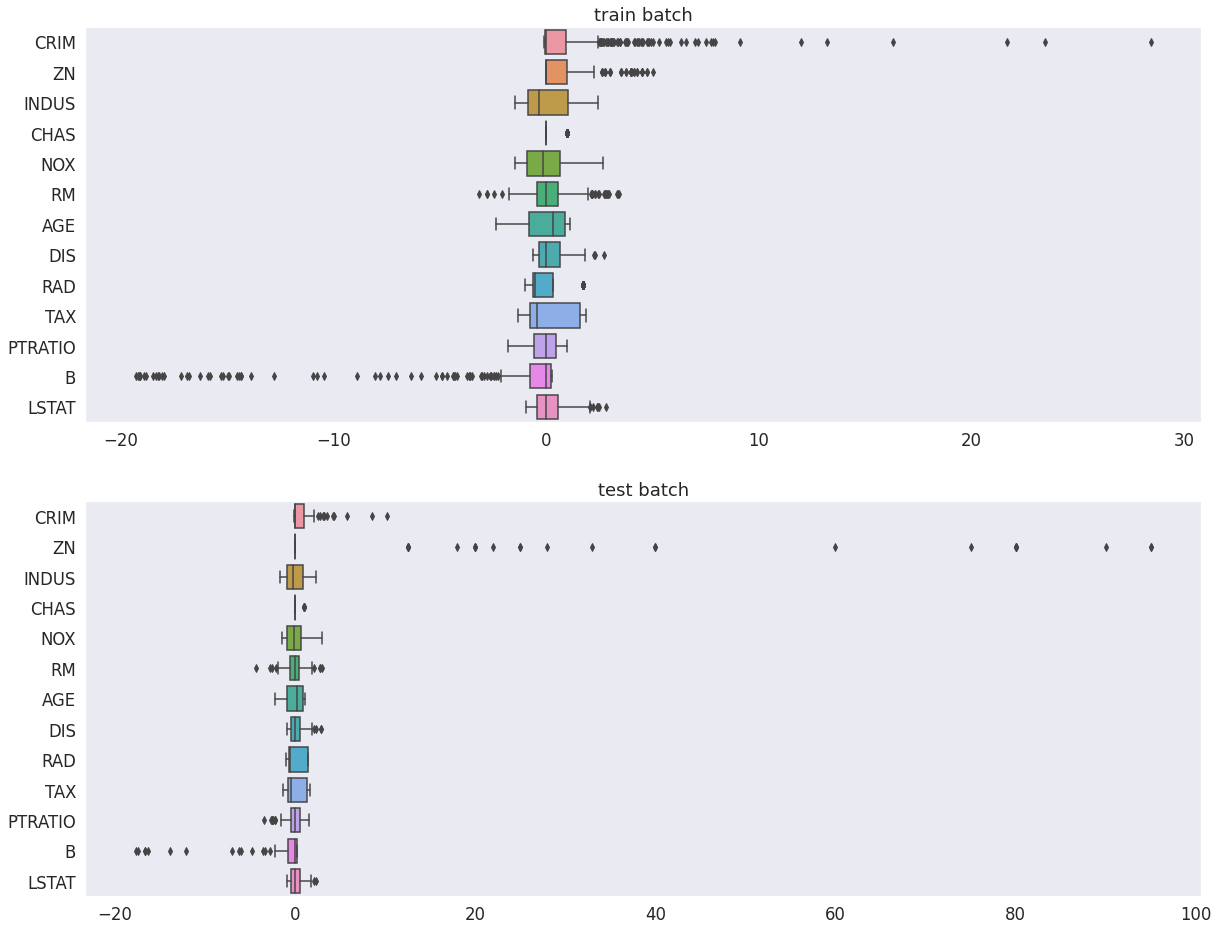

In [72]:
plt.figure(figsize=(20,16))

plt.subplot(2,1,1)
sns.boxplot(data=X_train_processed_df, orient='h');
plt.title('train batch')
plt.grid(axis='x')

plt.subplot(2,1,2)
sns.boxplot(data=X_test_processed_df, orient='h');

plt.title('test batch')
plt.grid(axis='x');

In [73]:
round(y_train_df.describe(),2)


,MEDV
count,404.00
mean,22.80
std,9.33
min,5.00
25%,16.95
50%,21.60
75%,26.40
max,50.00


In [74]:
round(y_test_df.describe(),2)

,MEDV
count,102.00
mean,21.49
std,8.61
min,5.00
25%,17.12
50%,20.15
75%,24.08
max,50.00


Check with a hypothesis test if the sample and the dataset of the dependent variable follow the same distribution:

H0: The means of "MEDV" in y_train and y_test are equal
H1: The means are not equal

In [75]:
def shapiro_test(a_df, b_df, alpha):
    stat, p = ttest_ind(a_df, b_df, equal_var=True)
    print(f'stat: {stat:.4}, p: {p}, alpha:{alpha}')
    if p > alpha:
        print('p > alpha : H0 cannot be refused. Probably the same distribution')
    else:
        print('p < alpha : H0 can be refused. Probably different distributions')

shapiro_test(y_train_df.MEDV, y_test_df.MEDV,alpha=0.05)

stat: 1.285, p: 0.1995398100634561, alpha:0.05
p > alpha : H0 cannot be refused. Probably the same distribution


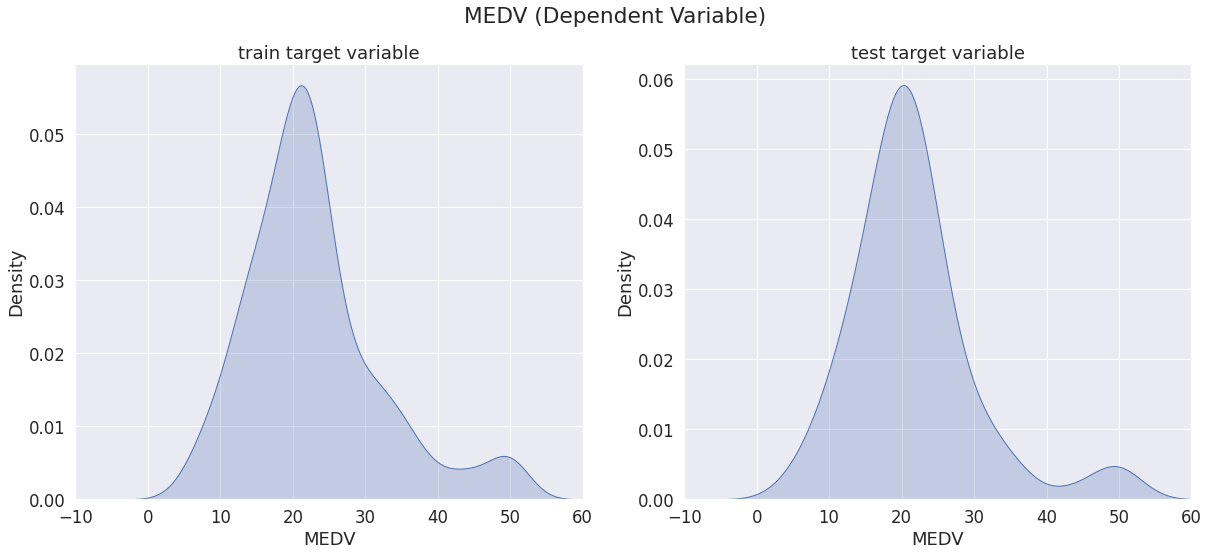

In [76]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.kdeplot(data=y_train_df, x='MEDV', palette="pastel",fill = True).set(xlim=(-10, 60))
plt.title('train target variable')
plt.subplot(1, 2, 2)
sns.kdeplot(data=y_test_df, x='MEDV', palette="pastel",fill = True).set(xlim=(-10, 60))
plt.title('test target variable')
plt.suptitle('MEDV (Dependent Variable)');

The sample and dataset have very similar mean, quartiles, and std values ​​for the dependent variable

Let's look at the predictors now. Three numeric variables are chosen: "RM", "AGE" and "TAX" to apply the hypothesis test:

In [77]:
shapiro_test(X_train_processed_df.RM, X_train_processed_df.RM,alpha=0.05)
shapiro_test(X_train_processed_df.AGE, X_test_processed_df.AGE,alpha=0.05)
shapiro_test(X_train_processed_df.TAX, X_test_processed_df.TAX,alpha=0.05)

stat: 0.0, p: 1.0, alpha:0.05
p > alpha : H0 cannot be refused. Probably the same distribution
stat: -1.827e-15, p: 0.9999999999999986, alpha:0.05
p > alpha : H0 cannot be refused. Probably the same distribution
stat: -2.28e-15, p: 0.9999999999999982, alpha:0.05
p > alpha : H0 cannot be refused. Probably the same distribution


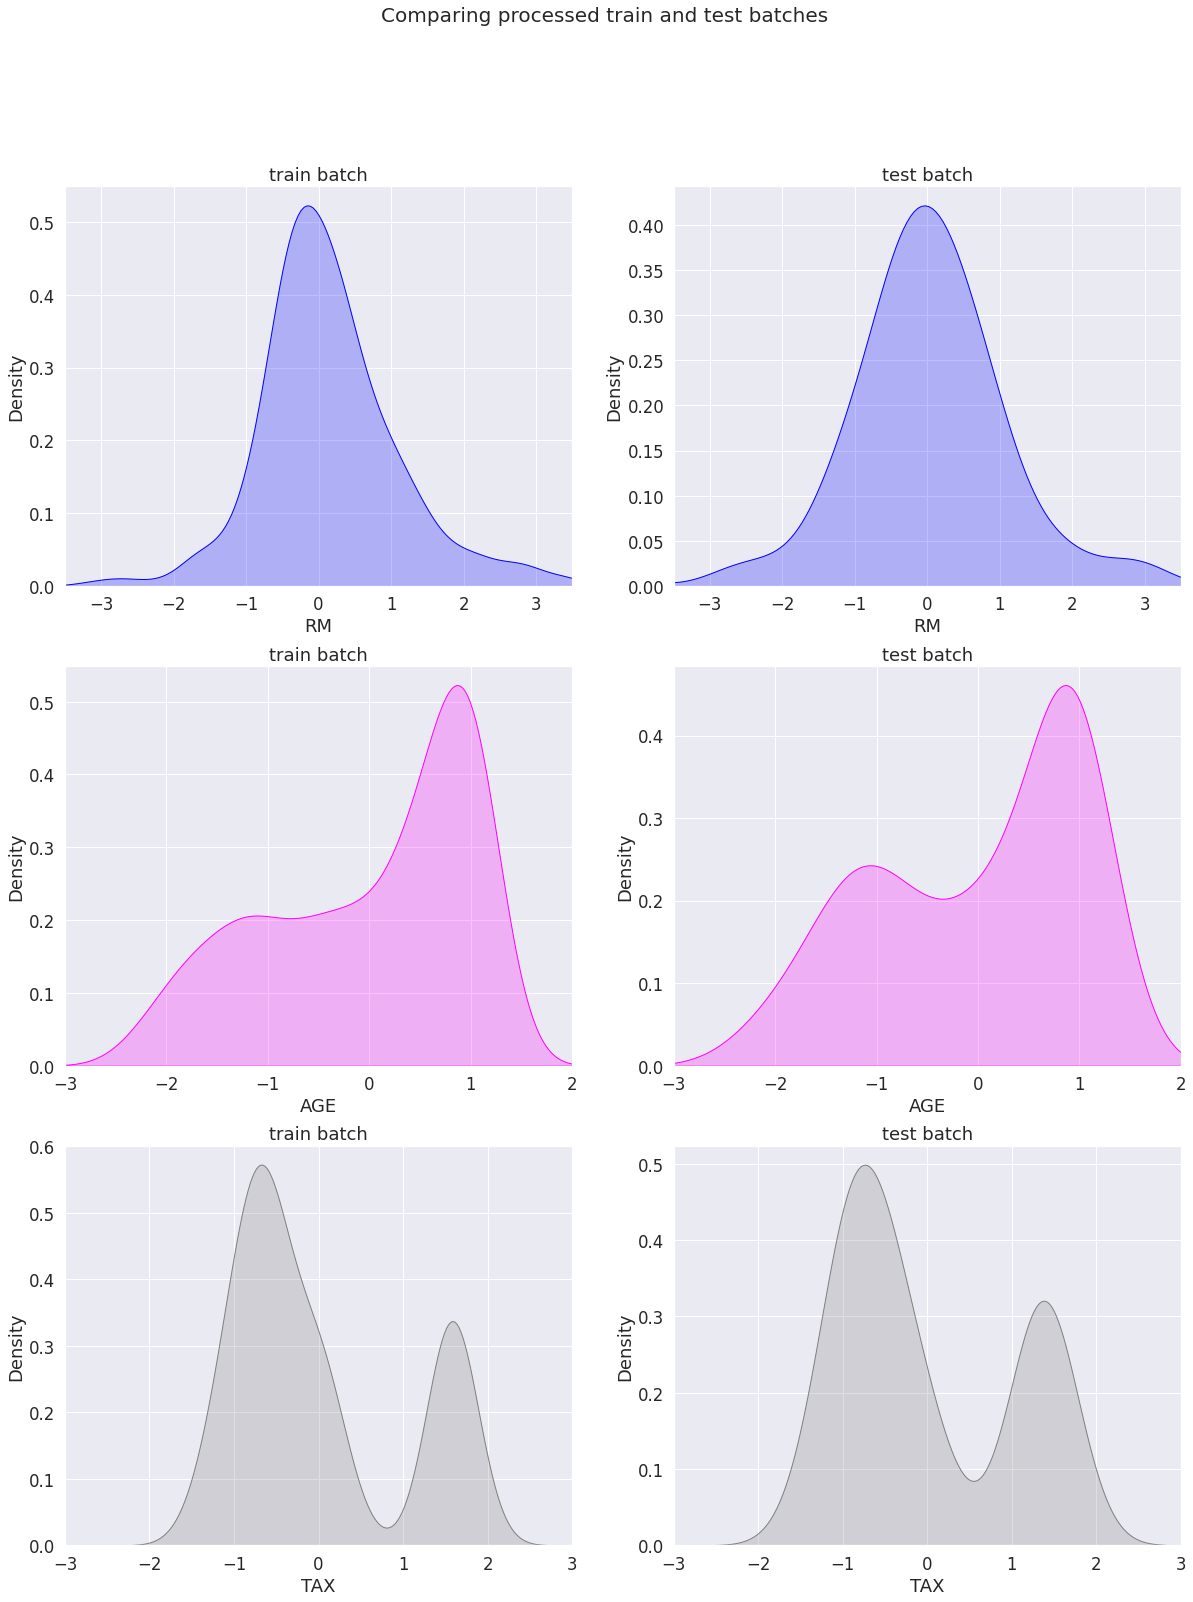

In [78]:
plt.figure(figsize=(20, 25))
plt.subplot(3, 2, 1)
sns.kdeplot(data=X_train_processed_df, x='RM', color="blue", fill = True).set(xlim=(-3.5, 3.5))
plt.title('train batch')
plt.subplot(3, 2, 2)
sns.kdeplot(data=X_test_processed_df, x='RM', color="blue", fill = True).set(xlim=(-3.5, 3.5))
plt.title('test batch')
plt.subplot(3, 2, 3)
sns.kdeplot(data=X_train_processed_df, x='AGE', color="magenta", fill = True).set(xlim=(-3, 2))
plt.title('train batch')
plt.subplot(3, 2, 4)
sns.kdeplot(data=X_test_processed_df, x='AGE', color="magenta", fill = True).set(xlim=(-3, 2))
plt.title('test batch')
plt.subplot(3, 2, 5)
sns.kdeplot(data=X_train_processed_df, x='TAX', color="grey", fill = True).set(xlim=(-3, 3))
plt.title('train batch')
plt.subplot(3, 2, 6)
sns.kdeplot(data=X_test_processed_df, x='TAX', color="grey", fill = True).set(xlim=(-3, 3))
plt.title('test batch')
plt.suptitle('Comparing processed train and test batches', fontsize = 20);


Check that the distribution of a categorical column ("RAD" is selected, which has only 9 unique values) is also similar. In both cases the distribution is similar

In [79]:
df.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

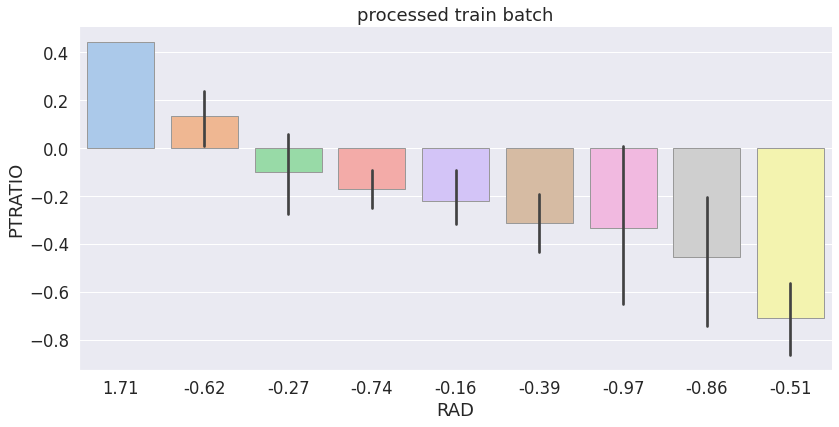

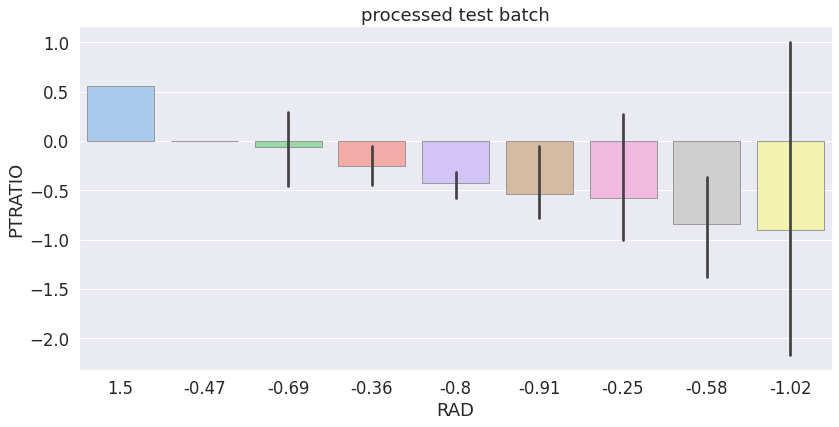

In [80]:
X_train_processed_df['RAD'] = round(X_train_processed_df['RAD'], 2)
X_test_processed_df['RAD'] = round(X_test_processed_df['RAD'], 2)
sns.set(font_scale = 1.5)
plot_order = X_train_processed_df.groupby('RAD').PTRATIO.mean().sort_values(ascending=False).index


sns.catplot(x="RAD", y="PTRATIO", kind="bar",
            palette="pastel", edgecolor=".6", height = 6, aspect = 2,
            data=X_train_processed_df, order=plot_order) 
plt.title('processed train batch')

plot_order = X_test_processed_df.groupby('RAD').PTRATIO.mean().sort_values(ascending=False).index
sns.catplot(x="RAD", y="PTRATIO", kind="bar",
            palette="pastel", edgecolor=".6", height = 6, aspect = 2,
           data=X_test_processed_df, order=plot_order);
plt.title('processed test batch');

In [81]:
     #attributes
Q1 = X_train_processed_df.quantile(0.25)
Q3 = X_train_processed_df.quantile(0.75)
IQR = Q3 - Q1   #interquartilic range

outliers_bool = (X_train_processed_df < (Q1 - 1.5 * IQR)) |(X_train_processed_df > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)
outliers_perc = outliers_abs * 100 / X_train_processed_df.count(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')
print(f'% of outliers vs total:\n{outliers_perc}')

Total number of outliers:
CRIM        61
ZN          36
INDUS        0
CHAS        29
NOX          0
RM          24
AGE          0
DIS          3
RAD        101
TAX          0
PTRATIO      0
B           63
LSTAT        7
dtype: int64

% of outliers vs total:
CRIM       15.099010
ZN          8.910891
INDUS       0.000000
CHAS        7.178218
NOX         0.000000
RM          5.940594
AGE         0.000000
DIS         0.742574
RAD        25.000000
TAX         0.000000
PTRATIO     0.000000
B          15.594059
LSTAT       1.732673
dtype: float64


In [82]:
    #attributes
Q1 = X_test_processed_df.quantile(0.25)
Q3 = X_test_processed_df.quantile(0.75)
IQR = Q3 - Q1   #interquartilic range

outliers_bool = (X_test_processed_df < (Q1 - 1.5 * IQR)) |(X_test_processed_df > (Q3 + 1.5 * IQR))
outliers_abs = outliers_bool.sum(axis=0)
outliers_perc = outliers_abs * 100 / X_test_processed_df.count(axis=0)

print(f'Total number of outliers:\n{outliers_abs}\n')
print(f'% of outliers vs total:\n{outliers_perc}')

Total number of outliers:
CRIM       11
ZN         24
INDUS       0
CHAS        6
NOX         0
RM          8
AGE         0
DIS         4
RAD         0
TAX         0
PTRATIO     9
B          14
LSTAT       2
dtype: int64

% of outliers vs total:
CRIM       10.784314
ZN         23.529412
INDUS       0.000000
CHAS        5.882353
NOX         0.000000
RM          7.843137
AGE         0.000000
DIS         3.921569
RAD         0.000000
TAX         0.000000
PTRATIO     8.823529
B          13.725490
LSTAT       1.960784
dtype: float64


#Conclusion
As a conclusion, it can be said that the train data set is very similar to the test data set, although there are some cases to look more closely at (for example, the total number and percentage of outliers).
It has to be noticed that after processing data the statistics change and there are differences. This issue needs to be looked after.